In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\likhi\OneDrive\Documents\agricultural sustainability.csv")

In [4]:
df.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [5]:
df.tail()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0
199,0.779876,7790.885867,683.908773,465.124722,161.501443,0


In [6]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [7]:
#features and target selection  14
X=df[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y=df['sustainability']

In [8]:
df['sustainability'].unique() 

array([0, 1])

In [9]:
X.shape  

(200, 5)

In [10]:
y.shape

(200,)

In [11]:
#trainig and testing st split  
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=11)

In [12]:
X_train.shape

(160, 5)

In [13]:
y_test.shape

(40,)

In [14]:
#instantiate the model-RFC
model=RandomForestClassifier(n_estimators=100,random_state=100)

In [15]:
#train the model
model.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [16]:
#pridiction
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
len(y_pred)

40

In [18]:
#Evaluate the model  100% ovrfiting
acc=accuracy_score(y_test,y_pred)
print(f'The accuracy score for RFC is {acc*100:.2f}%')

The accuracy score for RFC is 100.00%


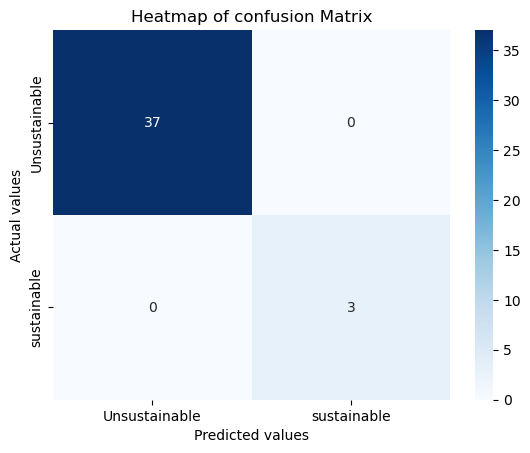

In [19]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',
           xticklabels=['Unsustainable','sustainable'],
           yticklabels=['Unsustainable','sustainable'])
plt.title('Heatmap of confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [20]:
#classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [21]:
#save model
import joblib
joblib.dump(model,'Rf_model.pkl')

['Rf_model.pkl']